In [1]:
import pandas as pd
import numpy as np

In [2]:
%run ./Functions/selectFiles.ipynb #gestisce button e schermata di dialogo con il file system
button = selectFiles() #è possibile selezionare più files

Selected files:
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test time walk e ToT/ChargeScan_PREAMP_30_CD_100_LDAC_14_soglia_1200.txt


In [3]:
def parseTxtChargeScan(file):
    channel = []
    tw_m = []
    tw_s = []

    num_points = 0
    points = []

    with open(file, 'rt') as myfile:
        lines = myfile.readlines()
    
        for i in range(0, len(lines)):
            if("x points") in lines[i]:
                num_points = int(lines[i].split()[2])
                for j in range(1,num_points+1):
                    points.append(float(lines[i+j].split()[0]))
        
            if("eff_data") in lines[i]:
                channel.append(int(lines[i].split()[1]))
            
                tw = []
                ts = []
                for j in range(1,num_points+1):
                    if(lines[i+j].split()[3] == "NaN" or lines[i+j].split()[4] == "NaN"):
                        tw.append(np.NAN)
                        ts.append(np.NAN)
                    else:
                        tw.append(float(lines[i+j].split()[3]))
                        ts.append(float(lines[i+j].split()[4]))

                tw_m.append(tw)    
                tw_s.append(ts)
    return pd.DataFrame(list(zip(channel, tw_m, tw_s)), columns = ["Channel", "tw_m", "tw_s"]), points 

In [4]:
dataframe, points = parseTxtChargeScan(button.files[0])

In [5]:
dataA = dataframe.loc[(dataframe['Channel'] >= 1) & (dataframe['Channel']<=127)] 
dataB = dataframe.loc[(dataframe['Channel'] >= 128) & (dataframe['Channel']<=239)]

In [37]:
import matplotlib.pyplot as plt

def plotTimeWalkMedio(dataA, dataB, x, soglia):
    def calcolaMedie(data):
        tiwal = data['tw_m'].values.tolist()
        minimo = np.nanmin(tiwal[0])
        delta_tw = [temp-minimo for temp in tiwal[0]]
   
        matrice_time_walk = np.matrix(delta_tw)
        medie_tw = matrice_time_walk.mean(0)
        return medie_tw.tolist()[0]        

    fig, ax = plt.subplots(figsize = (14, 8))
    fig.suptitle("Time Walk medio soglia "+ soglia + " elettroni")

    tw_medio_A = calcolaMedie(dataA)
    tw_medio_B = calcolaMedie(dataB)
    
    ax.plot(points,tw_medio_A , color = "blue")
    ax.plot(points, tw_medio_B, color = "red")
    ax.plot([0, 600], [25,25], "r--", color = "grey")
    
    a = np.arange(0,45+1,10).tolist()
    b = np.arange(60, int(max(points))+20, 20).tolist()
    

    for x in b:
        a.append(x)
    
    ax.set_xticks(a)
    ax.set_yticks(np.arange(0, 50, 2))
    
    ax.set_xlabel("Delta CalHI (mV)")
    ax.set_ylabel("Delta Time Walk (ns)")
    
    ax.legend([("RD53A"),("RD53B")])

    ax.annotate( "25ns",xy=(0, 0), xytext=(605, 25))
    """
    ax.annotate( str(round(tw_medio_B[25],2))+"mV",xy=(26, 25), xytext=(-5, 18),
            arrowprops=dict(facecolor='black', arrowstyle="->"))
    
    ax.annotate( str(round(tw_medio_A[25],2))+"mV",xy=(31, 25), xytext=(40, 19),
            arrowprops=dict(facecolor='black', arrowstyle="->"))
    """
    
    plt.show()    

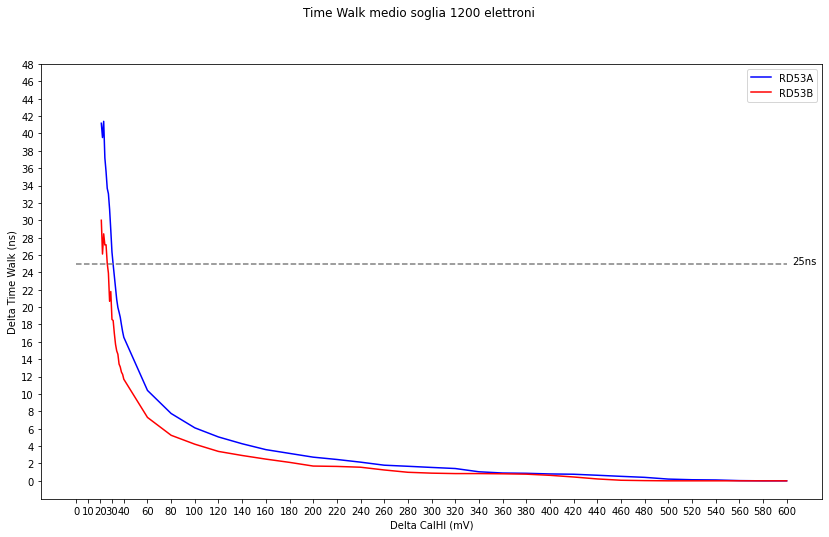

In [38]:
plotTimeWalkMedio(dataA, dataB, points, "1200")

In [39]:
button1000 = selectFiles() #è possibile selezionare più files

Selected files:
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test time walk e ToT/ChargeScan_PREAMP_30_CD_50_LDAC_14_soglia_1000.txt


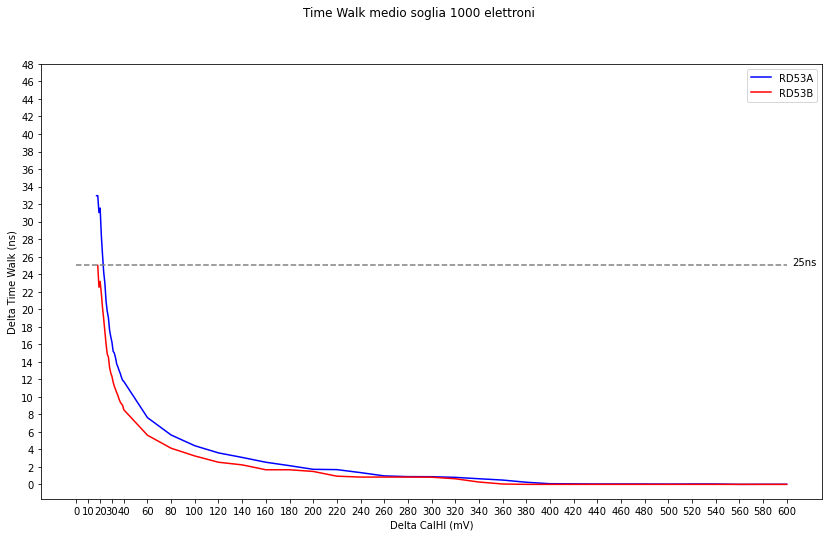

In [41]:
dataframe1000, points = parseTxtChargeScan(button1000.files[0])
dataA1000 = dataframe1000.loc[(dataframe1000['Channel'] >= 1) & (dataframe1000['Channel']<=127)] 
dataB1000 = dataframe1000.loc[(dataframe1000['Channel'] >= 128) & (dataframe1000['Channel']<=239)]
plotTimeWalkMedio(dataA1000, dataB1000, points, "1000")